> # PACKAGES AND LIBRARIES

In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

> # PATH, LABEL, TRANSFORMATION

#### MAIN

In [3]:
Main_WAV_Path = Path("F:\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data//") 
 

#### WAV PATH

In [4]:
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))

#### WAV LABELS

In [5]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wav_Path))

#### TO SERIES

In [6]:
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")

#### TO DATAFRAME

In [7]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [8]:
print(Main_Wav_Data.head(-1))

                                                    WAV    EMOTION
0     F:\TESS Toronto emotional speech set data\TESS...  OAF_angry
1     F:\TESS Toronto emotional speech set data\TESS...  OAF_angry
2     F:\TESS Toronto emotional speech set data\TESS...  OAF_angry
3     F:\TESS Toronto emotional speech set data\TESS...  OAF_angry
4     F:\TESS Toronto emotional speech set data\TESS...  OAF_angry
...                                                 ...        ...
2794  F:\TESS Toronto emotional speech set data\TESS...    YAF_sad
2795  F:\TESS Toronto emotional speech set data\TESS...    YAF_sad
2796  F:\TESS Toronto emotional speech set data\TESS...    YAF_sad
2797  F:\TESS Toronto emotional speech set data\TESS...    YAF_sad
2798  F:\TESS Toronto emotional speech set data\TESS...    YAF_sad

[2799 rows x 2 columns]


In [9]:
print(Main_Wav_Data["EMOTION"].value_counts())

OAF_angry                 200
YAF_pleasant_surprised    200
YAF_neutral               200
OAF_disgust               200
YAF_disgust               200
OAF_happy                 200
OAF_Pleasant_surprise     200
YAF_happy                 200
OAF_neutral               200
YAF_fear                  200
OAF_Fear                  200
YAF_sad                   200
OAF_Sad                   200
YAF_angry                 200
Name: EMOTION, dtype: int64


#### TO SHUFFLE

In [10]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

In [11]:
print(Main_Wav_Data.head(-1))

                                                    WAV                EMOTION
0     F:\TESS Toronto emotional speech set data\TESS...            YAF_disgust
1     F:\TESS Toronto emotional speech set data\TESS...                YAF_sad
2     F:\TESS Toronto emotional speech set data\TESS...               OAF_Fear
3     F:\TESS Toronto emotional speech set data\TESS...            OAF_disgust
4     F:\TESS Toronto emotional speech set data\TESS...  OAF_Pleasant_surprise
...                                                 ...                    ...
2794  F:\TESS Toronto emotional speech set data\TESS...              YAF_angry
2795  F:\TESS Toronto emotional speech set data\TESS...              YAF_angry
2796  F:\TESS Toronto emotional speech set data\TESS...              YAF_happy
2797  F:\TESS Toronto emotional speech set data\TESS...              OAF_happy
2798  F:\TESS Toronto emotional speech set data\TESS...              YAF_happy

[2799 rows x 2 columns]


> # DATA PROCESS FUNCTIONS

#### NOISE

In [12]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    
    return data

#### STRETCH

In [13]:
def stretch_process(data,rate=0.8):
    
    return librosa.effects.time_stretch(data,rate)

#### SHIFT

In [14]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5,high=5) * 1000)
    
    return np.roll(data,shift_range)

#### PITCH

In [15]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):
    
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

#### EXTRACT FEATURES

In [16]:
def extract_process(data):
    
    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))
    
    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))
    
    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))
    
    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))
    
    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))
    
    return output_result

#### EXPORT FEATURES

In [17]:
def export_process(path):
    
    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)
    
    output_1 = extract_process(data)
    result = np.array(output_1)
    
    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result,output_2))
    
    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch)
    result = np.vstack((result,output_3))
    
    return result

> # ANALYSIS

#### HEARING

In [18]:
rate,speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech,rate=rate,autoplay=False)

YAF_pleasant_surprised


In [19]:
rate,speech = read(Main_Wav_Data["WAV"][3])
print(Main_Wav_Data["EMOTION"][3])

Audio(speech,rate=rate,autoplay=False)

OAF_disgust


In [20]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])

Audio(speech,rate=rate,autoplay=False)

YAF_angry


#### SHAPE - TYPE

In [21]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_angry
(52291,)
int16
24414


In [22]:
rate,speech = read(Main_Wav_Data["WAV"][314])
print(Main_Wav_Data["EMOTION"][314])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Sad
(59744,)
int16
24414


In [23]:
rate,speech = read(Main_Wav_Data["WAV"][134])
print(Main_Wav_Data["EMOTION"][134])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_disgust
(59784,)
int16
24414


#### WAVEPLOT

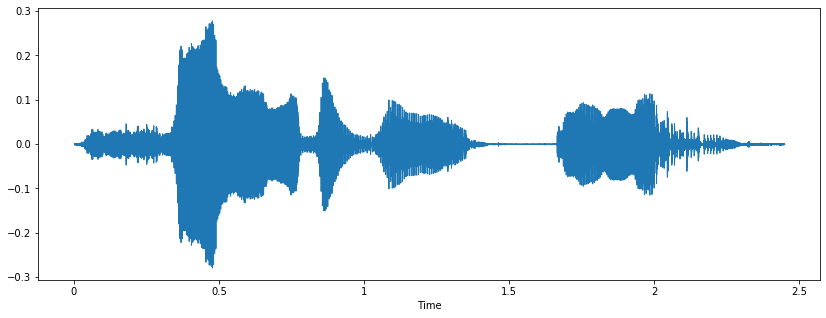

In [24]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][134])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

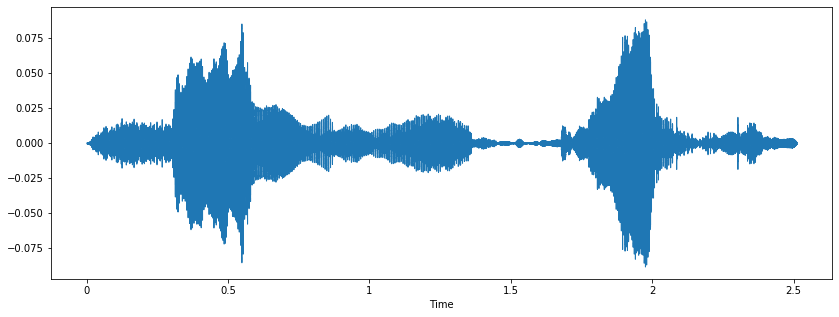

In [25]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][34])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

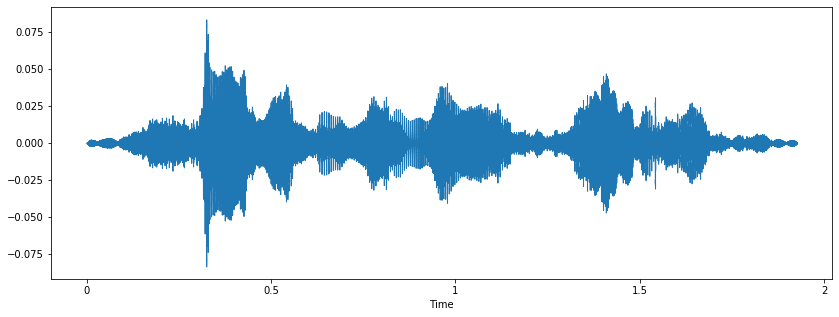

In [26]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

#### SPECSHOW

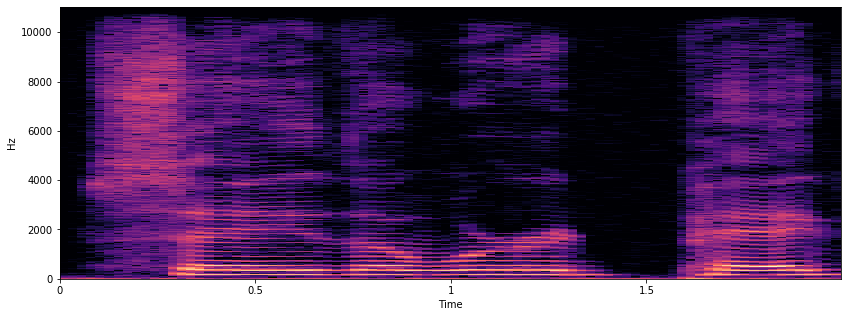

In [27]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][458])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

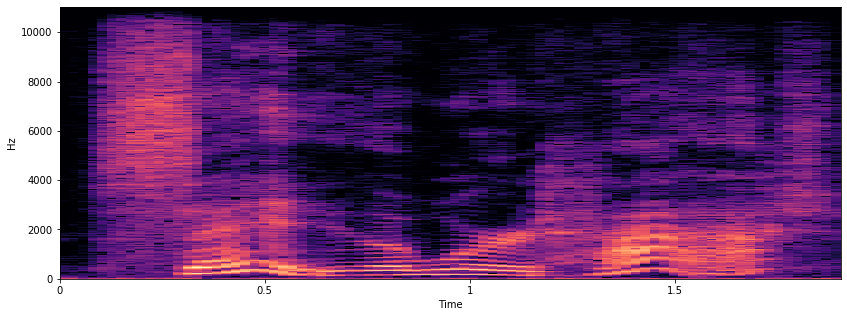

In [28]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

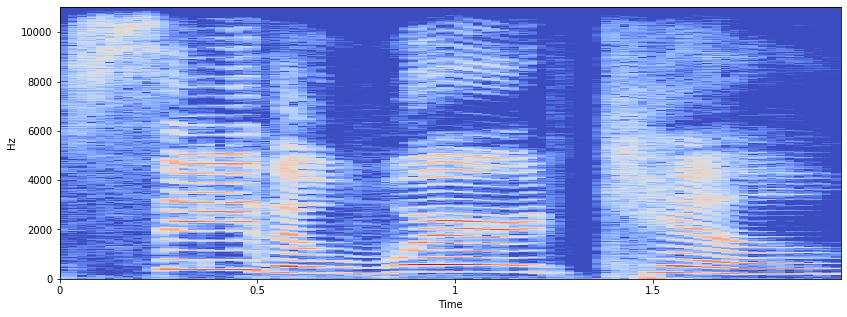

In [29]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

#### NOISE

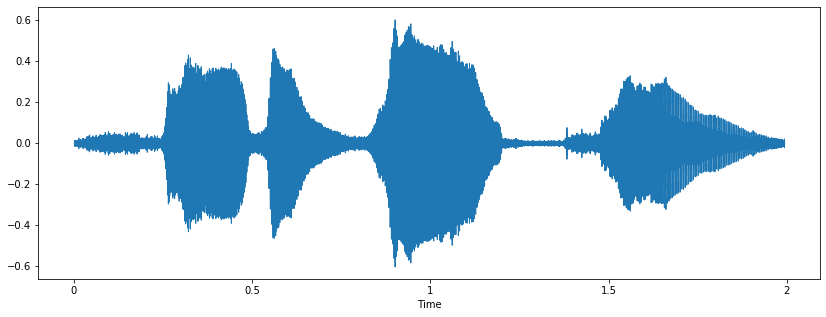

In [30]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveshow(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

#### STRETCHING

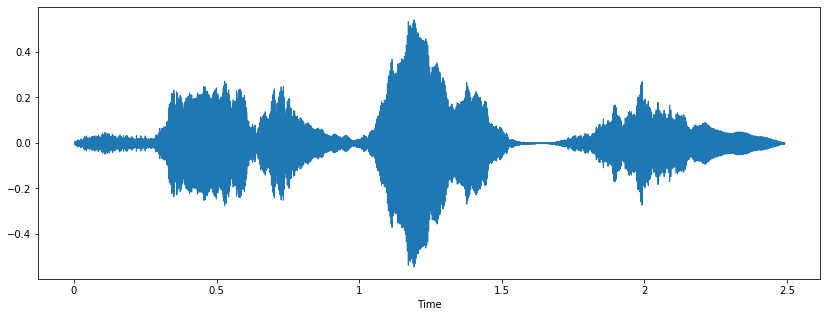

In [31]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveshow(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

#### SHIFTING

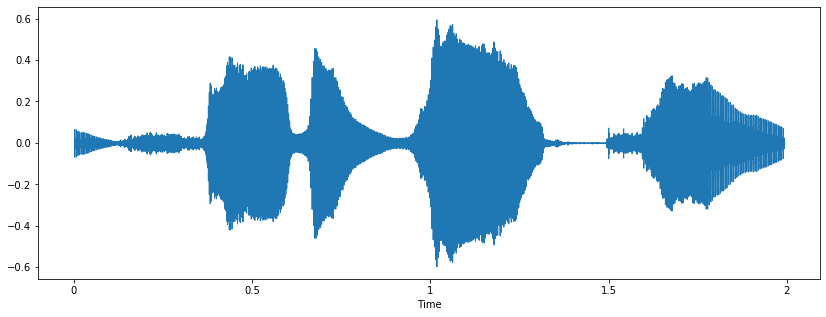

In [37]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveshow(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

#### PITCH

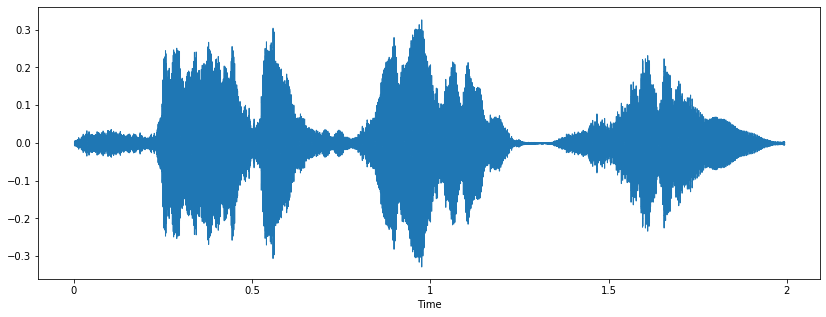

In [38]:

figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

pitch_audio = pitch_process(audio_speech,sample_rate)
librosa.display.waveshow(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

#### SAME TIMEFRAME PERIOD

(35115,)


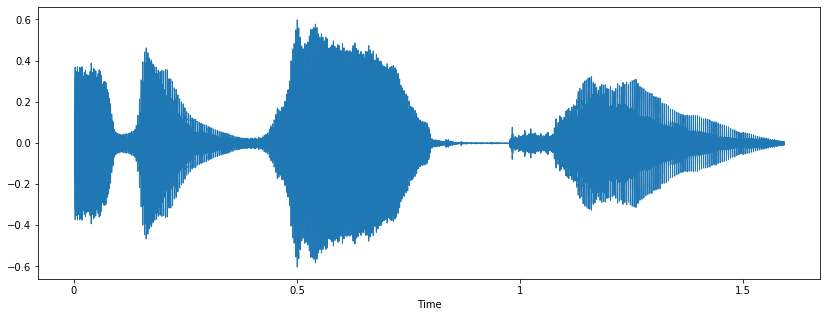

In [39]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000],duration=2.5,offset=0.4)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(39836,)


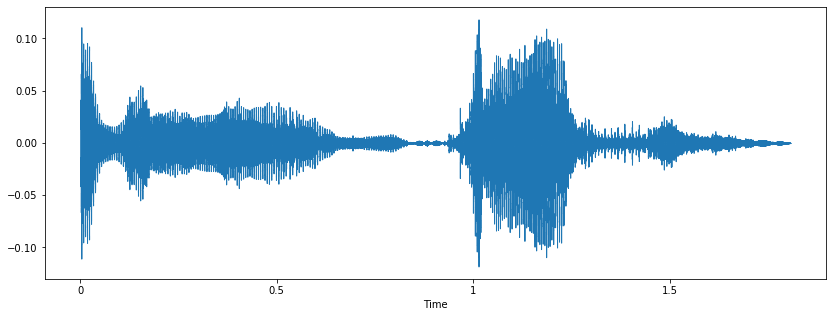

In [40]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][3],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(24750,)


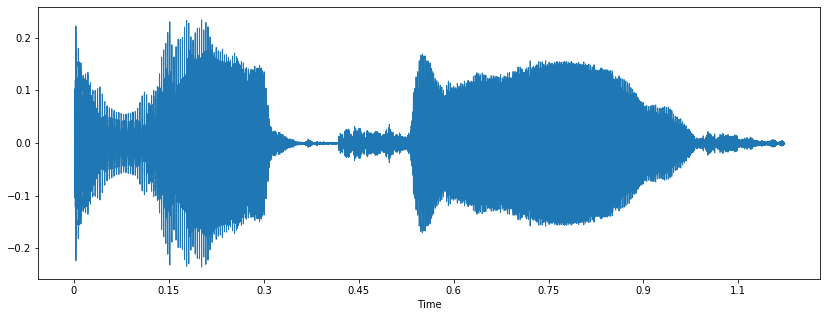

In [41]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][1398],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

> # DATA PROCESS AND ENGINEERING

#### TRANSFORMATION AND EXPORTATION

In [42]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):
    
    features = export_process(path)
    
    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

In [43]:
print(len(x_Train))
print(len(y_Train))
print(len(Main_Wav_Data.WAV))

8400
8400
2800


In [44]:
print(x_Train[0].shape)

(162,)


In [45]:
print(y_Train[0:5])

['YAF_disgust', 'YAF_disgust', 'YAF_disgust', 'YAF_sad', 'YAF_sad']


In [46]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [47]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.099790,0.540531,0.560530,0.551930,0.553623,0.569163,0.596939,0.660753,0.614634,0.590312,...,0.000281,0.000225,0.000174,0.000149,0.000098,0.000041,0.000030,0.000018,1.939613e-06,YAF_disgust
1,0.201304,0.576701,0.610593,0.644797,0.648523,0.668567,0.675559,0.702041,0.661896,0.633412,...,0.000598,0.000517,0.000503,0.000515,0.000422,0.000361,0.000345,0.000336,3.463960e-04,YAF_disgust
2,0.119537,0.483489,0.514929,0.553650,0.545602,0.543584,0.546333,0.592875,0.655780,0.637765,...,0.000121,0.000088,0.000061,0.000045,0.000035,0.000034,0.000017,0.000003,1.726738e-07,YAF_disgust
3,0.025879,0.331888,0.317843,0.220948,0.242811,0.254730,0.440417,0.498014,0.427368,0.513935,...,0.000054,0.000049,0.000032,0.000040,0.000050,0.000036,0.000032,0.000013,7.975196e-07,YAF_sad
4,0.025959,0.331869,0.318193,0.221123,0.242754,0.255056,0.440922,0.498213,0.427194,0.513903,...,0.000054,0.000049,0.000032,0.000040,0.000050,0.000036,0.000032,0.000013,8.148525e-07,YAF_sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.250458,0.478940,0.521023,0.581518,0.650980,0.522720,0.396362,0.378242,0.376823,0.391078,...,0.002348,0.002517,0.003857,0.002425,0.001783,0.001707,0.001330,0.000972,1.350312e-04,YAF_happy
8395,0.294321,0.588695,0.593324,0.704504,0.712719,0.572500,0.480100,0.457011,0.476496,0.513469,...,0.004575,0.004986,0.005952,0.004499,0.004454,0.004281,0.003661,0.003240,2.439873e-03,YAF_happy
8396,0.269061,0.458442,0.531526,0.510390,0.613038,0.662448,0.478180,0.413283,0.371641,0.353679,...,0.000434,0.000442,0.000522,0.000618,0.000704,0.000296,0.000289,0.000077,6.828798e-06,YAF_happy
8397,0.071847,0.394265,0.363889,0.327226,0.372720,0.464633,0.647076,0.636176,0.459681,0.377492,...,0.000011,0.000007,0.000010,0.000011,0.000012,0.000009,0.000013,0.000007,5.853960e-07,OAF_Sad


In [48]:
print(New_Features_Wav["EMOTIONS"].value_counts())

OAF_disgust               600
OAF_happy                 600
OAF_Pleasant_surprise     600
YAF_happy                 600
OAF_neutral               600
OAF_Sad                   600
OAF_angry                 600
YAF_pleasant_surprised    600
YAF_neutral               600
YAF_disgust               600
YAF_fear                  600
OAF_Fear                  600
YAF_sad                   600
YAF_angry                 600
Name: EMOTIONS, dtype: int64


#### SPLITTING

In [49]:
encoder_label = OneHotEncoder()

In [50]:
scaler_data = StandardScaler()

In [51]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [52]:
print(X.shape)
print(Y.shape)

(8400, 162)
(8400,)


In [53]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [54]:
print(Y.shape)

(8400, 14)


In [55]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [56]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(7560, 162)
(7560, 14)
(840, 162)
(840, 14)


In [57]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)

In [58]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162)
(840, 162)


In [59]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

In [60]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162, 1)
(840, 162, 1)


# MODEL STRUCTURE

In [61]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(xTrain.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=14, activation='softmax'))

In [62]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [63]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [64]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=50, validation_data=(xTest, yTest), callbacks=[early_stop])


Train on 7560 samples, validate on 840 samples
Epoch 1/50
7560/7560 [==============================] - 34s 4ms/step - loss: 1.8413 - accuracy: 0.3730 - val_loss: 0.8711 - val_accuracy: 0.7488
Epoch 2/50
7560/7560 [==============================] - 19s 3ms/step - loss: 0.8647 - accuracy: 0.7083 - val_loss: 0.4306 - val_accuracy: 0.8810
Epoch 3/50
7560/7560 [==============================] - 21s 3ms/step - loss: 0.5876 - accuracy: 0.8066 - val_loss: 0.2480 - val_accuracy: 0.9202
Epoch 4/50
7560/7560 [==============================] - 19s 3ms/step - loss: 0.4367 - accuracy: 0.8583 - val_loss: 0.1893 - val_accuracy: 0.9405
Epoch 5/50
7560/7560 [==============================] - 20s 3ms/step - loss: 0.3315 - accuracy: 0.8876 - val_loss: 0.1276 - val_accuracy: 0.9655
Epoch 6/50
7560/7560 [==============================] - 19s 2ms/step - loss: 0.2643 - accuracy: 0.9138 - val_loss: 0.1175 - val_accuracy: 0.9679
Epoch 7/50
7560/7560 [==============================] - 19s 2ms/step - loss: 0.227

<Figure size 720x720 with 0 Axes>

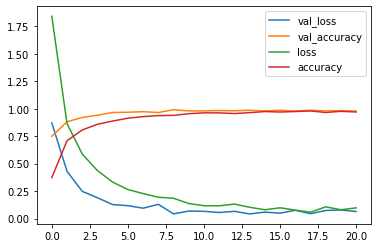

In [65]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

No handles with labels found to put in legend.


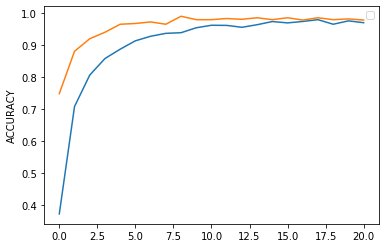

In [66]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


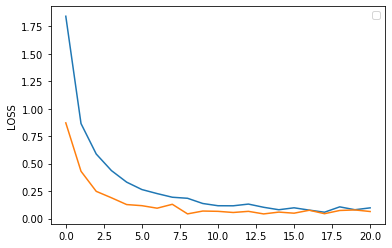

In [67]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

#### PREDICTION

In [68]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

840/840 [==============================] - 0s 584us/step
LOSS:  0.0643
ACCURACY:  0.9786


In [69]:
prediction_test = Model.predict(xTest)
y_prediction = encoder_label.inverse_transform(prediction_test)
yTest = encoder_label.inverse_transform(yTest)

In [70]:
print(prediction_test[0:10])

[[4.80815243e-06 1.26680546e-02 1.04351551e-04 3.57082790e-05
  9.84681010e-01 5.62288158e-04 7.72345174e-06 2.10127560e-04
  6.01778738e-04 2.17871548e-06 3.91892127e-06 4.28882850e-05
  1.20983328e-04 9.54059709e-04]
 [6.42901314e-13 2.57749343e-06 2.30221198e-09 5.81149768e-17
  8.70002737e-10 9.99997377e-01 2.82605851e-14 3.39769364e-21
  1.50339365e-20 3.79364096e-10 2.69442942e-13 3.11825200e-16
  3.64218253e-18 1.25747264e-12]
 [2.44478713e-07 5.98946121e-04 3.00151100e-06 4.03835429e-06
  9.99323726e-01 6.01912470e-05 1.45990828e-06 7.62947138e-07
  5.54019562e-06 9.24398946e-10 7.25435569e-08 1.58640898e-06
  3.35079278e-07 1.38861267e-07]
 [9.13272161e-05 9.98016603e-08 2.94970118e-06 2.69145021e-05
  1.29366144e-08 7.53794950e-07 2.48388310e-10 1.05054605e-05
  1.50551782e-09 9.90671039e-01 9.19171609e-03 5.93059397e-08
  4.27469104e-06 2.42712503e-07]
 [1.59151286e-11 3.86014831e-11 2.52012852e-19 7.08491974e-16
  8.93967084e-13 7.46434616e-17 7.00577834e-14 2.02942360e-07


In [71]:
print(y_prediction[0:10])

[['OAF_disgust']
 ['OAF_happy']
 ['OAF_disgust']
 ['YAF_fear']
 ['YAF_pleasant_surprised']
 ['YAF_happy']
 ['OAF_angry']
 ['YAF_happy']
 ['YAF_pleasant_surprised']
 ['OAF_neutral']]


In [72]:
print(yTest[0:10])

[['OAF_disgust']
 ['OAF_happy']
 ['OAF_disgust']
 ['YAF_fear']
 ['YAF_pleasant_surprised']
 ['YAF_happy']
 ['OAF_angry']
 ['YAF_happy']
 ['YAF_pleasant_surprised']
 ['OAF_neutral']]


In [73]:
conf_matrix = confusion_matrix(yTest, y_prediction)

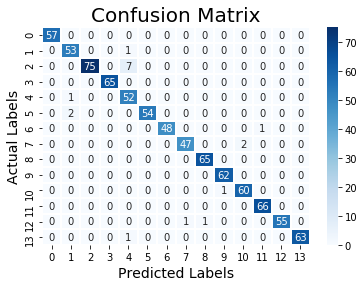

In [74]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [75]:
print(classification_report(yTest, y_prediction))

                        precision    recall  f1-score   support

              OAF_Fear       1.00      1.00      1.00        57
 OAF_Pleasant_surprise       0.95      0.98      0.96        54
               OAF_Sad       1.00      0.91      0.96        82
             OAF_angry       1.00      1.00      1.00        65
           OAF_disgust       0.85      0.98      0.91        53
             OAF_happy       1.00      0.96      0.98        56
           OAF_neutral       1.00      0.98      0.99        49
             YAF_angry       0.98      0.96      0.97        49
           YAF_disgust       0.98      1.00      0.99        65
              YAF_fear       0.98      1.00      0.99        62
             YAF_happy       0.97      0.98      0.98        61
           YAF_neutral       0.99      1.00      0.99        66
YAF_pleasant_surprised       1.00      0.96      0.98        57
               YAF_sad       1.00      0.98      0.99        64

              accuracy                

In [76]:
print(accuracy_score(yTest, y_prediction))

0.9785714285714285


#### SPECIAL PREDICTION

In [77]:
new_predict_list = []
feat_new = export_process("F:/audio Sentiment _/TRAIN/10.wav")
#F:\audio Sentiment _\TRAIN
#"F:\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data//
for feat in feat_new:
    new_predict_list.append(feat)

In [78]:
print(new_predict_list[0].shape)

(162,)


In [79]:
New_Predict_Feat = pd.DataFrame(new_predict_list)

In [80]:
New_Predict_Feat = scaler_data.fit_transform(New_Predict_Feat)
New_Predict_Feat = np.expand_dims(New_Predict_Feat,axis=2)

In [81]:
print(New_Predict_Feat.shape)

(3, 162, 1)


In [82]:
prediction_nonseen = Model.predict(New_Predict_Feat)
arg_prediction_nonseen = prediction_nonseen.argmax(axis=-1)
y_prediction_nonseen = encoder_label.inverse_transform(prediction_nonseen)


In [85]:
#print(arg_prediction_nonseen)
print(y_prediction_nonseen[0])

['OAF_Sad']
